In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [7]:
all_data = pd.read_csv('./csv_files/all_data.csv')

In [8]:
all_data.head()

,id,boundary,structure,strain,orien,aspect,size,subtraction
0,1,0,0,NaN,2.0,0.107459,257.56,205.01
1,2,0,2,1.0,4.0,0.589215,203.32,117.53
2,3,0,0,2.0,4.0,0.290944,15.91,13.29
3,4,0,0,3.0,1.0,0.256198,257.93,202.06
4,5,0,0,2.0,4.0,0.120000,84.60,52.88


In [9]:
all_data.shape

(217, 8)

*strainとorienのNaNの行ごと取り除く。*

In [10]:
all_data = all_data[~all_data[['strain', 'orien']].isnull().any(axis=1)].reset_index(drop=True)
all_data

,id,boundary,structure,strain,orien,aspect,size,subtraction
0,2,0,2,1.0,4.0,0.589215,203.32,117.53
1,3,0,0,2.0,4.0,0.290944,15.91,13.29
2,4,0,0,3.0,1.0,0.256198,257.93,202.06
3,5,0,0,2.0,4.0,0.120000,84.60,52.88
4,6,0,0,2.0,2.0,0.340909,21.04,18.55
5,7,0,0,2.0,2.0,0.176471,40.34,22.27
6,8,0,0,3.0,1.0,0.400000,11.80,7.94
7,9,0,0,2.0,4.0,0.630000,27.07,17.97
8,10,0,0,2.0,1.0,0.576923,31.92,11.37
9,12,0,0,2.0,2.0,0.438026,23.96,13.89


In [12]:
all_data.shape

(168, 8)

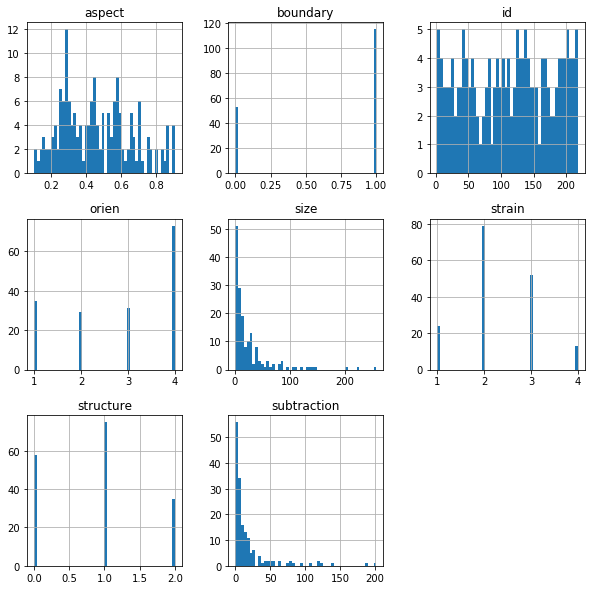

In [16]:
all_data.hist(bins=50, figsize=(10,10))
plt.show()

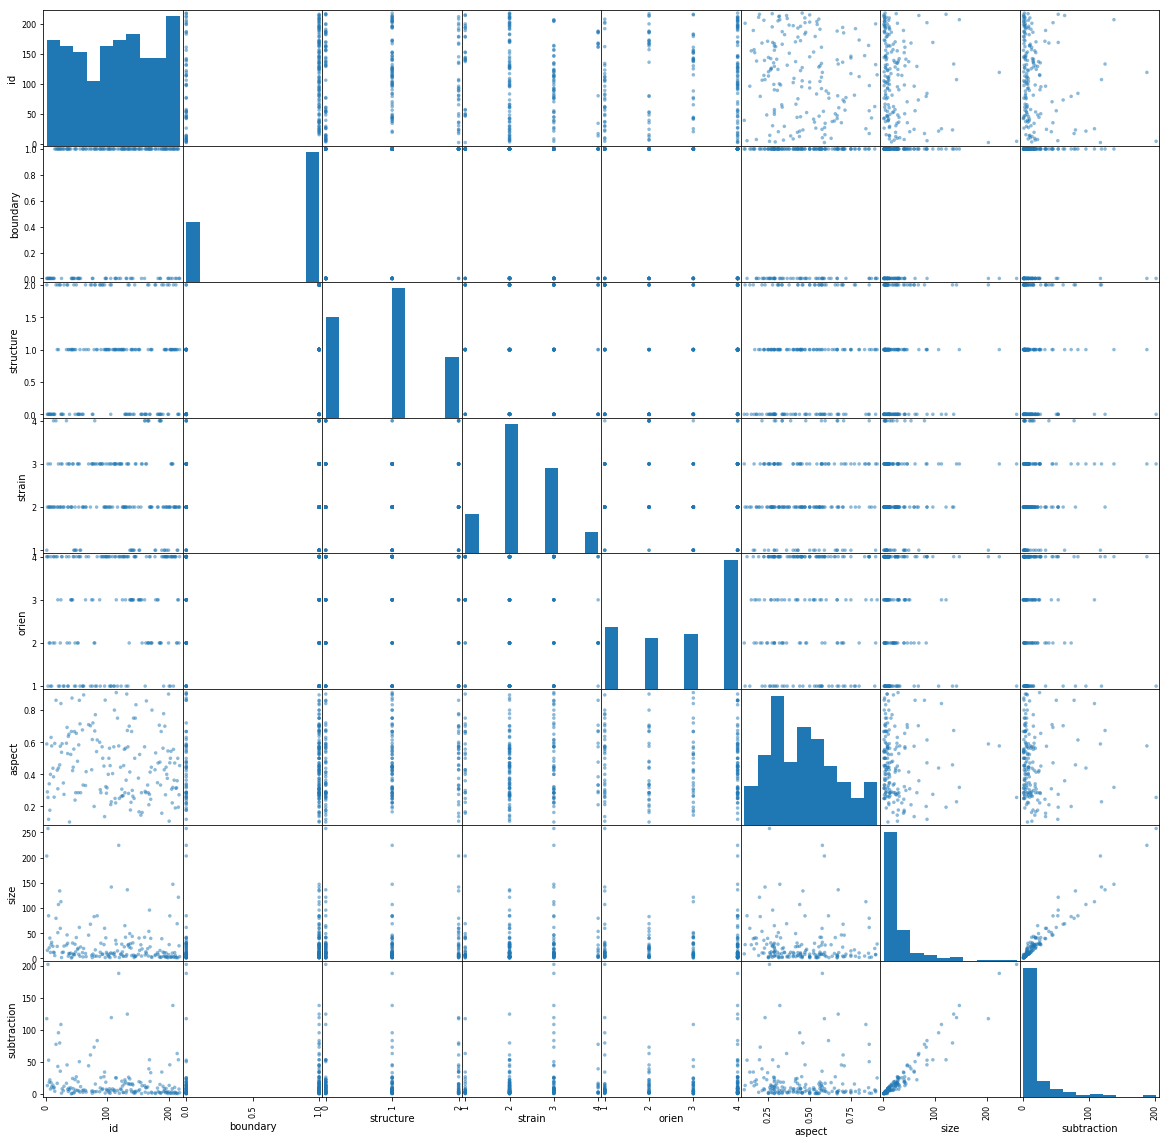

In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(all_data, figsize=(20,20), s=50)
plt.show()

*aspectとsizeを離散化*

In [13]:
pd.qcut(all_data['aspect'], 5).value_counts()

(0.376, 0.5]      35
(0.653, 0.909]    34
(0.102, 0.278]    34
(0.278, 0.376]    33
(0.5, 0.653]      32
Name: aspect, dtype: int64

In [186]:
pd.qcut(all_data['aspect'], 5, labels=False)

0      3
1      1
2      0
3      0
4      1
5      0
6      2
7      3
8      3
9      2
10     2
11     0
12     3
13     4
14     2
15     1
16     2
17     2
18     3
19     4
20     3
21     3
22     1
23     0
24     3
25     4
26     3
27     3
28     3
29     0
      ..
138    4
139    0
140    3
141    4
142    2
143    4
144    0
145    2
146    2
147    1
148    3
149    4
150    0
151    2
152    2
153    3
154    1
155    0
156    1
157    3
158    1
159    2
160    0
161    1
162    1
163    1
164    2
165    0
166    0
167    2
Name: aspect, Length: 168, dtype: int64

In [187]:
all_data.aspect = pd.qcut(all_data['aspect'], 5, labels=False)

In [188]:
pd.qcut(all_data['size'], 5).value_counts()

(0.909, 4.12]       36
(40.084, 257.93]    34
(18.184, 40.084]    33
(8.41, 18.184]      33
(4.12, 8.41]        32
Name: size, dtype: int64

In [189]:
all_data.size = pd.qcut(all_data['size'], 5, labels=False)

In [190]:
all_data[['strain', 'orien']] = all_data[['strain', 'orien']].astype('int64')

In [191]:
all_data

,id,boundary,structure,strain,orien,aspect,size,subtraction
0,2,0,2,1,4,3,4,117.53
1,3,0,0,2,4,1,2,13.29
2,4,0,0,3,1,0,4,202.06
3,5,0,0,2,4,0,4,52.88
4,6,0,0,2,2,1,3,18.55
5,7,0,0,2,2,0,4,22.27
6,8,0,0,3,1,2,2,7.94
7,9,0,0,2,4,3,3,17.97
8,10,0,0,2,1,3,3,11.37
9,12,0,0,2,2,2,3,13.89


In [192]:
y_train = all_data.subtraction.values
train = all_data.drop(['id', 'subtraction'], axis=1).values
train

array([[0, 2, 1, 4, 3, 4],
       [0, 0, 2, 4, 1, 2],
       [0, 0, 3, 1, 0, 4],
       ...,
       [1, 0, 2, 3, 0, 4],
       [0, 0, 2, 2, 0, 3],
       [0, 1, 2, 4, 2, 0]])

In [194]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    train, y_train, test_size=0.1, random_state=42
)

## cross-validation開始

In [196]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [197]:
n_folds = 10

def rmsle_cv(model):
    kf = StratifiedKFold(n_folds, shuffle=True, random_state=42).get_n_splits(xtrain)
    rmse= np.sqrt(-cross_val_score(model, xtrain, ytrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 様々な予測器を試す。

In [198]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [204]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [17]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [201]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

In [202]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## それぞれの予測器のrmseをみる

In [206]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 21.3549 (9.8773)



In [207]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 24.2546 (7.0776)



In [208]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 18.4949 (8.5521)



In [209]:
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


lin_reg score: 20.7278 (10.7407)



In [210]:
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


forest_reg score: 18.7715 (7.9852)



## correlation coefficientの計算と、random forestのGridSearch開始

In [211]:
def cc(y, y_pre):
    correlation = pd.DataFrame({'y':y, 'y_pre':y_pre})
    return print('correlation coefficient is: {0:0.3f}'.format(correlation.corr().iloc[0,1]))

In [212]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(xtrain, ytrain)
cc(forest_reg.predict(xtest), ytest)

correlation coefficient is: 0.542


In [219]:
fi = forest_reg.feature_importances_.reshape(1,-1)
fi

array([[0.03611538, 0.08664983, 0.05910544, 0.15414736, 0.05347443,
        0.61050756]])

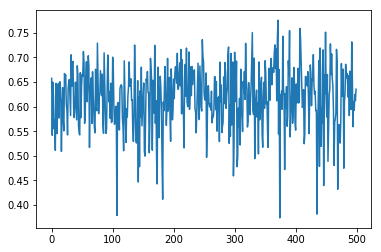

In [225]:
import matplotlib.pyplot as plt

nrange = range(0,500)
grid_score = []
feature_importances = np.ones((0,xtrain[0, :].shape[0]))

for i in nrange:
    forest_reg = RandomForestRegressor(random_state=i)
    forest_reg.fit(xtrain, ytrain)
    correlation = pd.DataFrame({'y':ytest, 'y_pre':forest_reg.predict(xtest)})
    grid_score.append(correlation.corr().iloc[0,1])
    fi = forest_reg.feature_importances_.reshape(1,-1)
    feature_importances = np.r_[feature_importances, fi]
plt.plot(nrange, grid_score)

In [226]:
feature_importances.mean(axis=0)

array([0.05810559, 0.06382095, 0.07815639, 0.13354486, 0.07974935,
       0.58662285])

In [233]:
list(all_data.columns[1:7])

['boundary', 'structure', 'strain', 'orien', 'aspect', 'size']

## 予測器をlightgbmにし、GridSearchを行う。

In [234]:
from sklearn.model_selection import KFold, train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    train, y_train, test_size=0.1, random_state=42
)

In [235]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression')

In [236]:
model_lgb.fit(xtrain, ytrain)
print('チューニング前')
cc(model_lgb.predict(xtest), ytest)

チューニング前
correlation coefficient is: 0.722


In [239]:
model_lgb.fit(train, y_train)
print('全ての訓練セットを使った場合')
cc(model_lgb.predict(train), y_train)

全ての訓練セットを使った場合
correlation coefficient is: 0.766


In [240]:
model_lgb.feature_importances_

array([28, 34, 39, 24, 33, 42])

# PCAで寄与度評価してみる

In [246]:
col = np.array(list(all_data.columns[1:7]))
train_dataframe = pd.DataFrame(train, columns=col)

In [247]:
from sklearn.decomposition import PCA

pca = PCA()
train_pca = pca.fit_transform(pd.DataFrame(train_dataframe))
pca.explained_variance_ratio_

array([0.34525348, 0.25194838, 0.20128606, 0.09722648, 0.08036678,
       0.02391882])

# K近傍法

In [269]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 17)
knn.fit(train.astype('int'), y_train)

score = rmsle_cv(knn)
print("knn score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

knn score: 19.5172 (11.4151)



In [270]:
k_range = range(1, 90)
accuracy = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train, y_train)
    accuracy.append(rmsle_cv(knn).mean())

Text(0,0.5,'Testing Accuracy')

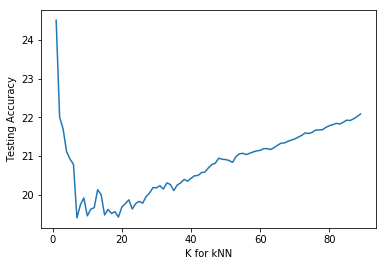

In [271]:
import matplotlib.pyplot as plt

plt.plot(k_range, accuracy)
plt.xlabel('K for kNN')
plt.ylabel('Testing Accuracy')